In [ ]:
"""
https://anderfernandez.com/blog/pycaret-low-code-machine-learning-en-python/#C%C3%B3mo-crear-un-modelo-de-clasificaci%C3%B3n-con-PyCaret
https://pycaret.readthedocs.io/en/latest/api/classification.html
"""
print("Referencia)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret import classification
from pycaret.classification import get_config
from pycaret.classification import setup, compare_models, tune_model, plot_model,\
  save_model, load_model, evaluate_model
from pycaret.classification import setup, create_model
# from pycaret.classification import deep_check
from sklearn.datasets import load_breast_cancer

In [26]:
print(pycaret.__version__)

3.3.2


In [27]:
print(dir(classification))

['ClassificationExperiment', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'add_metric', 'automl', 'blend_models', 'calibrate_model', 'check_drift', 'check_fairness', 'compare_models', 'convert_model', 'create_api', 'create_app', 'create_docker', 'create_model', 'dashboard', 'deploy_model', 'ensemble_model', 'evaluate_model', 'finalize_model', 'functional', 'get_allowed_engines', 'get_config', 'get_current_experiment', 'get_engine', 'get_leaderboard', 'get_logs', 'get_metrics', 'interpret_model', 'load_experiment', 'load_model', 'models', 'oop', 'optimize_threshold', 'plot_model', 'predict_model', 'pull', 'remove_metric', 'save_experiment', 'save_model', 'set_config', 'set_current_experiment', 'setup', 'stack_models', 'tune_model']


In [2]:
breast_cancer = load_breast_cancer(as_frame=True)
breast_cancer.frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: >

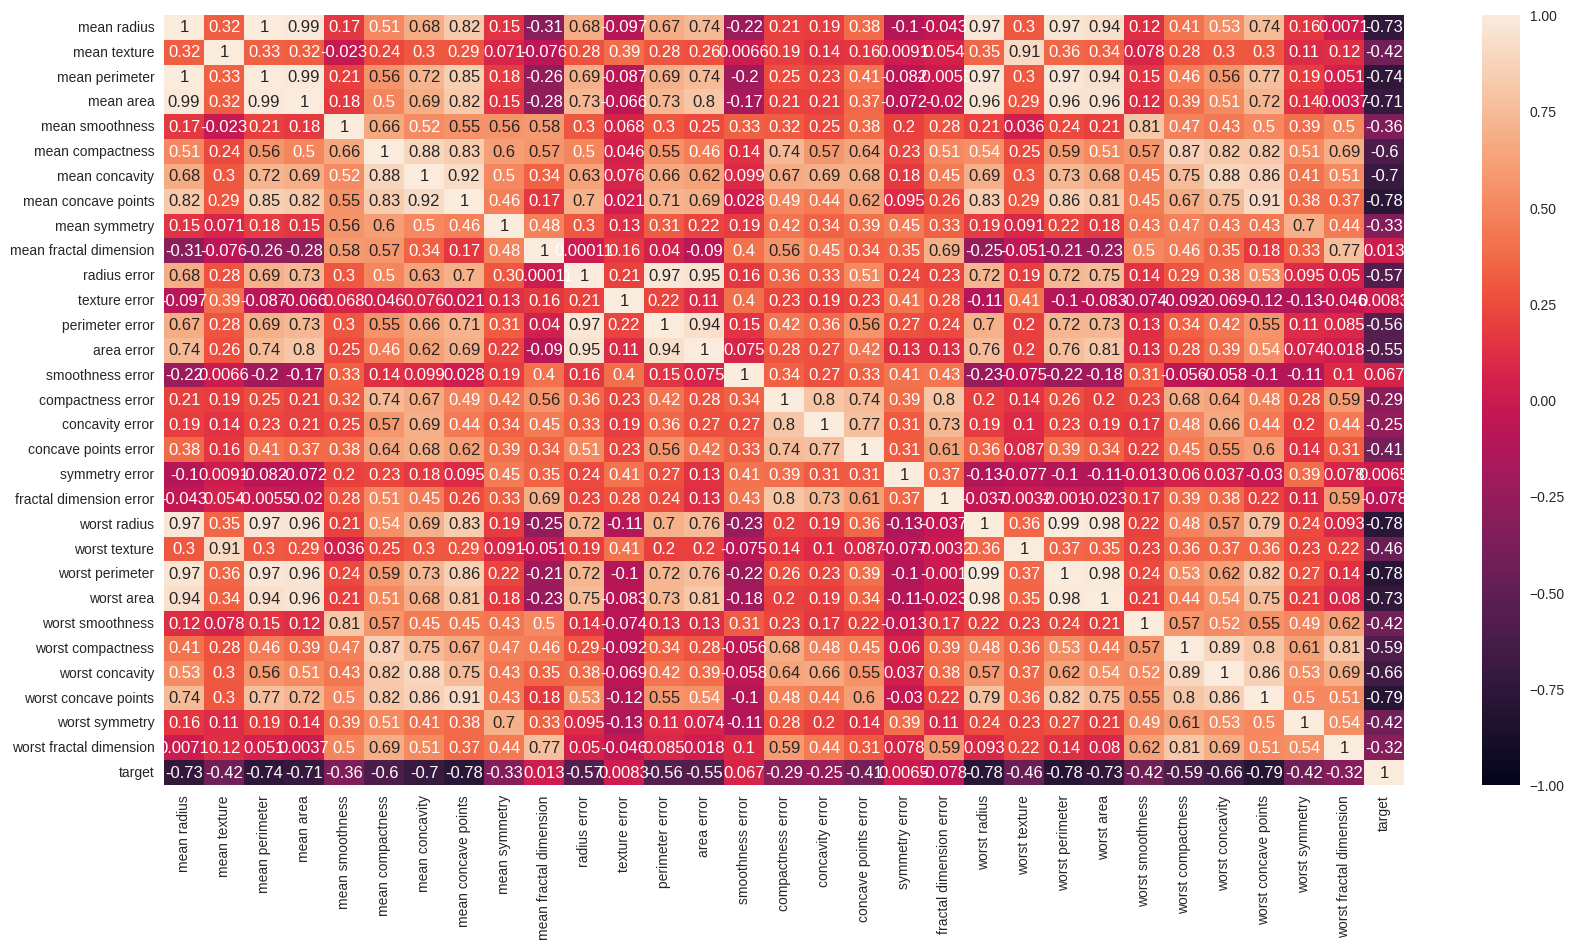

In [3]:
plt.rcParams["figure.figsize"] = (20, 10) 
sns.heatmap(breast_cancer.frame.corr(), vmin = -1, vmax = 1, annot = True)

In [4]:
california_housing_setup = setup(
    data = breast_cancer.frame,
    target = 'target',
    normalize = True,
    transformation = True,
    pca = True, 
    pca_components = 0.8,
    remove_multicollinearity = True,
    multicollinearity_threshold = 0.8,
    #ignore_low_variance = True,
    remove_outliers = True,
    imputation_type = 'simple',
    numeric_imputation = 'median'#,
    #silent = True
)

,Description,Value
0,Session id,844
1,Target,target
2,Target type,Binary
3,Original data shape,"(569, 31)"
4,Transformed data shape,"(549, 6)"
5,Transformed train set shape,"(378, 6)"
6,Transformed test set shape,"(171, 6)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [6]:
"""
La línea prep_pipe = get_config('prep_pipe') recupera el objeto de la tubería de preprocesamiento 
(prep_pipe) que PyCaret genera automáticamente durante la configuración (setup()).  

Este objeto contiene todas las transformaciones aplicadas a los datos, como normalización, 
eliminación de multicolinealidad, imputación, reducción de dimensionalidad (PCA), etc. 
Puedes usarlo para aplicar las mismas transformaciones a nuevos datos o verificar cómo se procesaron 
los datos originales.    
"""
#prep_pipe = get_config('prep_pipe')  en esta version de pycaret no es prep_pipe sino pipeline
prep_pipe = get_config('pipeline')
print(prep_pipe)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['mean radius', 'mean texture',
                                             'mean perimeter', 'mean area',
                                             'mean smoothness',
                                             'mean compactness',
                                             'mean concavity',
                                             'mean concave points',
                                             'mean symmetry',
                                             'mean fractal dimension',
                                             'radius error', 'texture error',
                                             'perimeter error', 'area error',
                                             'smoothness...
                 TransformerWrapper(exclude=[], include=None,
                                    tra

In [7]:
prep_pipe.transform(breast_cancer.frame) 

,target,pca0,pca1,pca2,pca3,pca4
0,0,-4.440469,-2.344774,-0.680187,1.406777,-2.015207
1,0,0.468090,0.227791,-1.650469,-0.590612,-0.740231
2,0,-2.458150,0.382568,-1.729218,0.812355,-0.981347
3,0,-6.742694,-2.578953,0.125908,1.924499,0.595474
4,0,-1.495635,0.997391,0.261244,-1.204260,-2.748991
...,...,...,...,...,...,...
564,0,-1.288161,2.963921,-0.563192,-2.205402,-1.928614
565,0,-0.374031,3.641545,-0.745143,0.298072,0.271306
566,0,0.187143,2.297261,-1.156171,-2.103994,0.320865
567,0,-4.899079,0.307940,-1.649040,0.807620,1.292993


In [8]:
models = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9197,0.9763,0.9280,0.9436,0.9352,0.8298,0.8317,0.0830
et,Extra Trees Classifier,0.9298,0.9743,0.9480,0.9415,0.9443,0.8493,0.8507,0.1510
lr,Logistic Regression,0.9174,0.9726,0.9240,0.9441,0.9329,0.8252,0.8284,0.4730
lda,Linear Discriminant Analysis,0.9148,0.9723,0.9120,0.9510,0.9301,0.8209,0.8246,0.0860
ridge,Ridge Classifier,0.9148,0.9720,0.9120,0.9510,0.9301,0.8209,0.8246,0.0810
rf,Random Forest Classifier,0.9096,0.9676,0.9240,0.9328,0.9274,0.8074,0.8106,0.1560
gbc,Gradient Boosting Classifier,0.8997,0.9647,0.9320,0.9123,0.9209,0.7833,0.7877,0.1270
lightgbm,Light Gradient Boosting Machine,0.9072,0.9644,0.9400,0.9155,0.9271,0.7995,0.8017,51.7950
knn,K Neighbors Classifier,0.9021,0.9627,0.9200,0.9240,0.9215,0.7912,0.7928,0.0900
svm,SVM - Linear Kernel,0.8844,0.9585,0.9000,0.9158,0.9067,0.7545,0.7573,0.0820


In [9]:
models

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=844, verbose=0,
                      warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=844, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)]

### Evaluación del rendimiento de los modelos

In [31]:
# deep_check(models[0])
evaluate_model(models[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
"""
Pipeline Plot: Un gráfico que muestra las distintas etapas de un pipeline de procesamiento de datos 
    y modelado, permitiendo visualizar cómo se transforman los datos a través de cada etapa.
Hyperparameters: Un gráfico o reporte que muestra los valores de los hiperparámetros utilizados en el modelo 
    y cómo afectan su rendimiento.
AUC (Area Under the Curve): Un gráfico que muestra el área bajo la curva ROC (Receiver Operating Characteristic), 
    que es una medida de la capacidad de un modelo para distinguir entre clases.
Confusion Matrix: Una tabla que muestra los verdaderos positivos, verdaderos negativos, falsos positivos
    y falsos negativos, proporcionando una visión detallada del rendimiento del modelo de clasificación.
Threshold: Un gráfico que muestra cómo varían las métricas de rendimiento (como precisión y recall) del modelo 
    a medida que se cambia el umbral de decisión.
Precision Recall: Un gráfico que muestra la relación entre la precisión y el recall del modelo, útil para evaluar
    el rendimiento en problemas de clasificación desequilibrada.
Prediction Error: Un gráfico que muestra la diferencia entre los valores predichos y los valores reales, 
    permitiendo evaluar la precisión de las predicciones del modelo.
Class Report: Un reporte que incluye métricas de rendimiento como precisión, recall y F1-score para cada clase 
    en un problema de clasificación.
Feature Selection: Un gráfico o reporte que muestra el proceso de selección de características, indicando cuáles 
    son las más relevantes para el modelo.
Learning Curve: Un gráfico que muestra cómo varía el rendimiento del modelo (usualmente error de entrenamiento
    y validación) a medida que aumenta la cantidad de datos de entrenamiento.
Manifold Learning: Un conjunto de técnicas y gráficos que reducen la dimensionalidad de los datos y permiten
    visualizar estructuras intrínsecas en datos de alta dimensión.
Calibration Curve: Un gráfico que compara las probabilidades predichas por el modelo con las verdaderas
    probabilidades observadas, útil para evaluar la calibración del modelo.
Validation Curve: Un gráfico que muestra cómo varía el rendimiento del modelo en el conjunto de validación 
    a medida que se cambian los valores de un hiperparámetro.
Dimensions: Un gráfico que muestra la distribución de los datos en el espacio de características, a menudo 
    utilizando técnicas de reducción de dimensionalidad.
Feature Importance: Un gráfico que muestra la importancia relativa de cada característica en el modelo, 
    indicando cuáles tienen mayor impacto en las predicciones.
Feature Importance (Shapley Values): Un gráfico que utiliza los valores de Shapley para mostrar la contribución 
    de cada característica en las predicciones del modelo.
Decision Boundary: Un gráfico que muestra las regiones del espacio de características donde el modelo predice
    cada clase, útil para visualizar cómo el modelo clasifica diferentes áreas del espacio de características.
Gain Chart: Un gráfico que muestra la ganancia acumulada a medida que se incrementa el número de instancias, 
    útil para evaluar la efectividad del modelo de clasificación.
Decision Tree: Un gráfico que muestra la estructura de un árbol de decisión, indicando las decisiones 
    tomadas en cada nodo y las características utilizadas.
KS Statistic Plot: Un gráfico que muestra la estadística KS (Kolmogorov-Smirnov), que mide la distancia 
    máxima entre las distribuciones acumulativas de las clases positivas y negativas.
Lift Chart: Un gráfico que muestra la efectividad del modelo en comparación con un modelo aleatorio, 
    indicando cuánto mejora el modelo sobre una referencia aleatoria.

Estas herramientas son fundamentales para evaluar y entender el rendimiento y comportamiento de los modelos de 
    machine learning
"""
print("")